#  Amazon Product Sales Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('Amazon Dataset.csv')

In [11]:
df.head()

,product_id,product_name,category,discounted_price_₹,actual_price_₹,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,"0,64",42,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,"0,43",40,43994,"Compatible with all Type C enabled devices, be...",AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn,RGIQEG07R9HS2,A Good Braided Cable for Your Type C Device,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,"0,9",39,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,Kunal,R3J3EQQ9TZI5ZJ,Good speed for earlier versions,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,"0,53",42,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,Omkar dhale,R3EEUZKKK9J36I,Good product,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,"0,61",42,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSA,rahuls6099,R1BP4L2HH9TFUP,As good as original,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [12]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price_₹',
       'actual_price_₹', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

## Re-Data Cleanup

In [ ]:
# Sepertating the 'category' column into multiple columns
df[['Category1', 'Category2', 'Category3']] = df['category'].str.split('|', expand=True, n=2)

df.drop(columns=['category'], inplace=True)

df.rename(columns={'Category1': 'Category', 'Category2': 'Subcategory1', 'Category3': 'Subcategory2'}, inplace=True)

df.head()

,product_id,product_name,discounted_price_₹,actual_price_₹,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Category,Subcategory1,Subcategory2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,1099,"0,64",42,24269,High Compatibility : Compatible With iPhone 12...,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,"0,43",40,43994,"Compatible with all Type C enabled devices, be...",AECPFYFQVRUWC3KGNLJIOREFP5LQ,ArdKn,RGIQEG07R9HS2,A Good Braided Cable for Your Type C Device,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,1899,"0,9",39,7928,【 Fast Charger& Data Sync】-With built-in safet...,AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,Kunal,R3J3EQQ9TZI5ZJ,Good speed for earlier versions,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,"0,53",42,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,Omkar dhale,R3EEUZKKK9J36I,Good product,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,"0,61",42,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,AE3Q6KSUK5P75D5HFYHCRAOLODSA,rahuls6099,R1BP4L2HH9TFUP,As good as original,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories|Cables|USBCables


In [14]:
# Change value of 'discount_percentage'
df['discount_percentage'] = df['discount_percentage'].replace({',': '.'}, regex=True)

In [15]:
# change "discount_percentage" column to float
df['discount_percentage'] = df['discount_percentage'].astype(float)

## Visualize Data

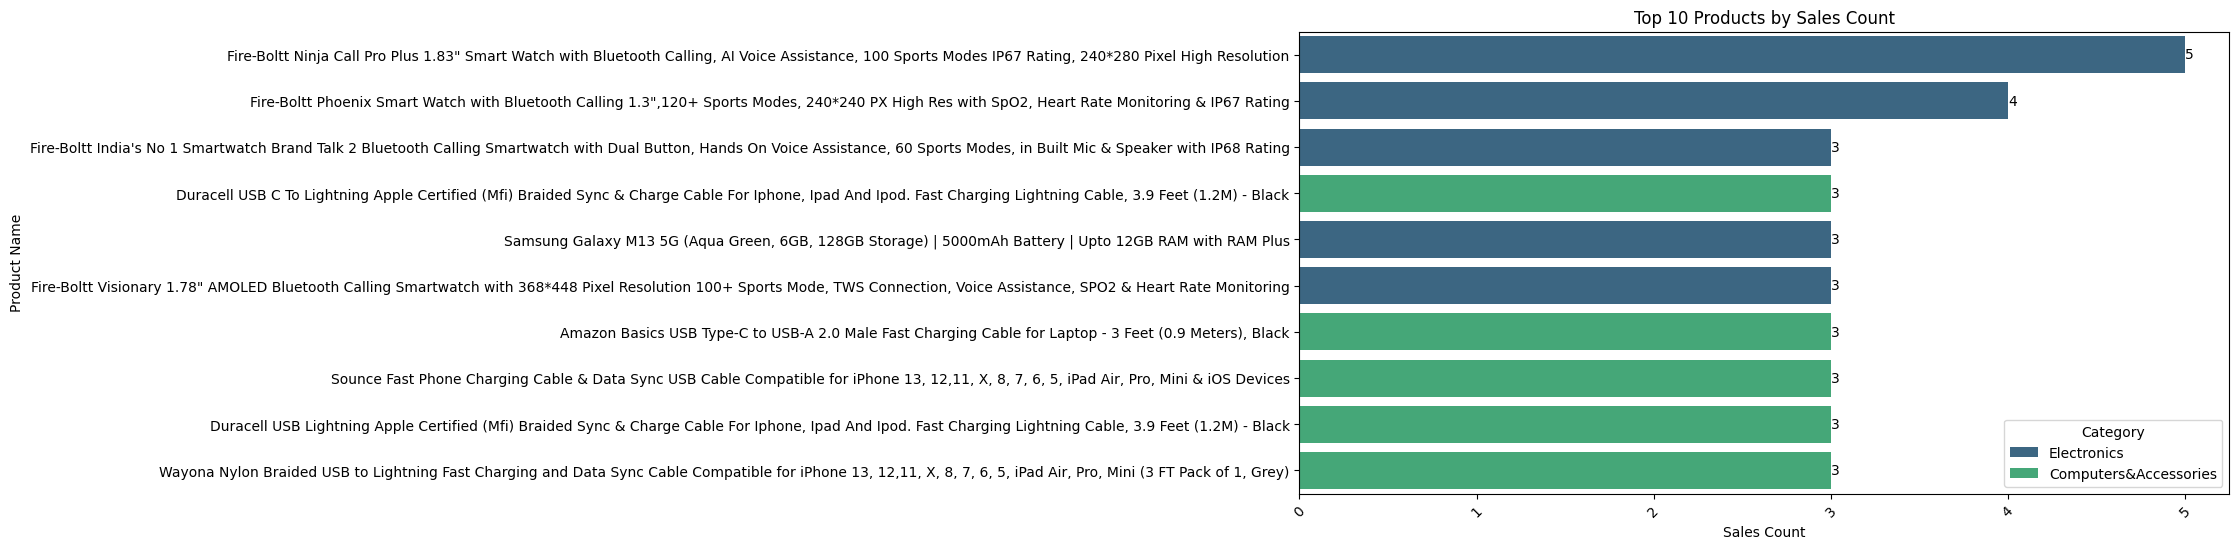

In [ ]:
# Visualize the top 10 products by sales count in each category
top_products = df.groupby(['product_name', 'Category']).agg({'product_id': 'count'}).reset_index()
top_products = top_products.sort_values(by='product_id', ascending=False).head(10)

plt.figure(figsize=(12, 6))

ax = sns.barplot(x='product_id', y='product_name', hue='Category', data=top_products, palette='viridis', dodge=False)
plt.xlabel('Sales Count')
plt.ylabel('Product Name')
plt.xticks(rotation=45)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

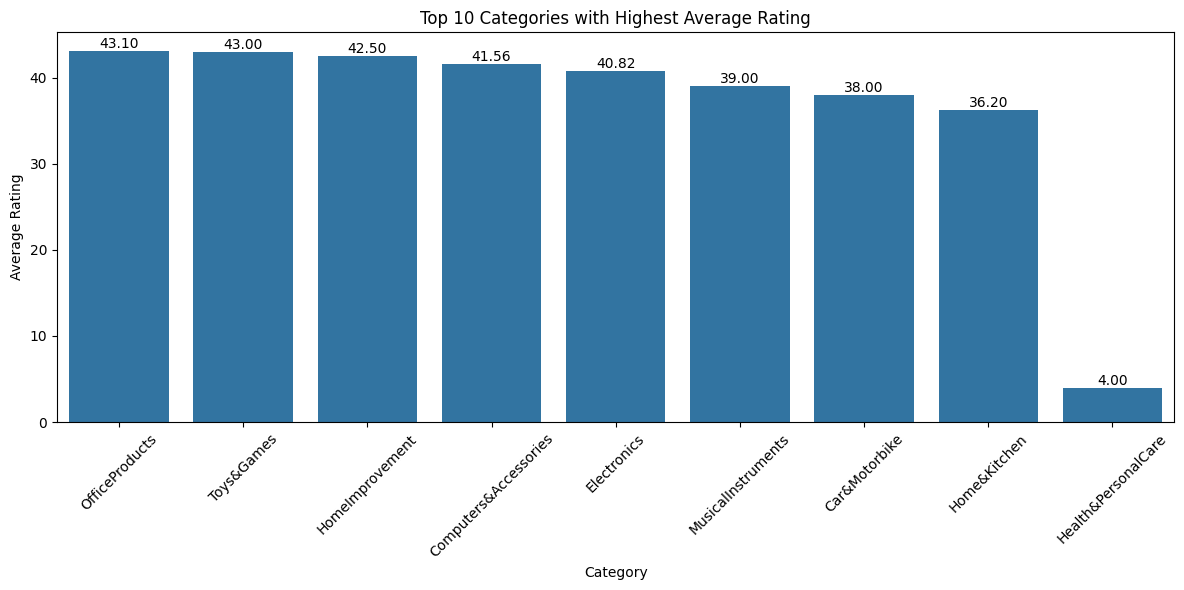

In [ ]:
# Visualizing Top 10 Category With The Highest Average Rating
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Category', y='rating', data=df, estimator=np.mean, ci=None, order=df.groupby('Category')['rating'].mean().sort_values(ascending=False).index[:10])
plt.title('Top 10 Categories with Highest Average Rating')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Rating')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

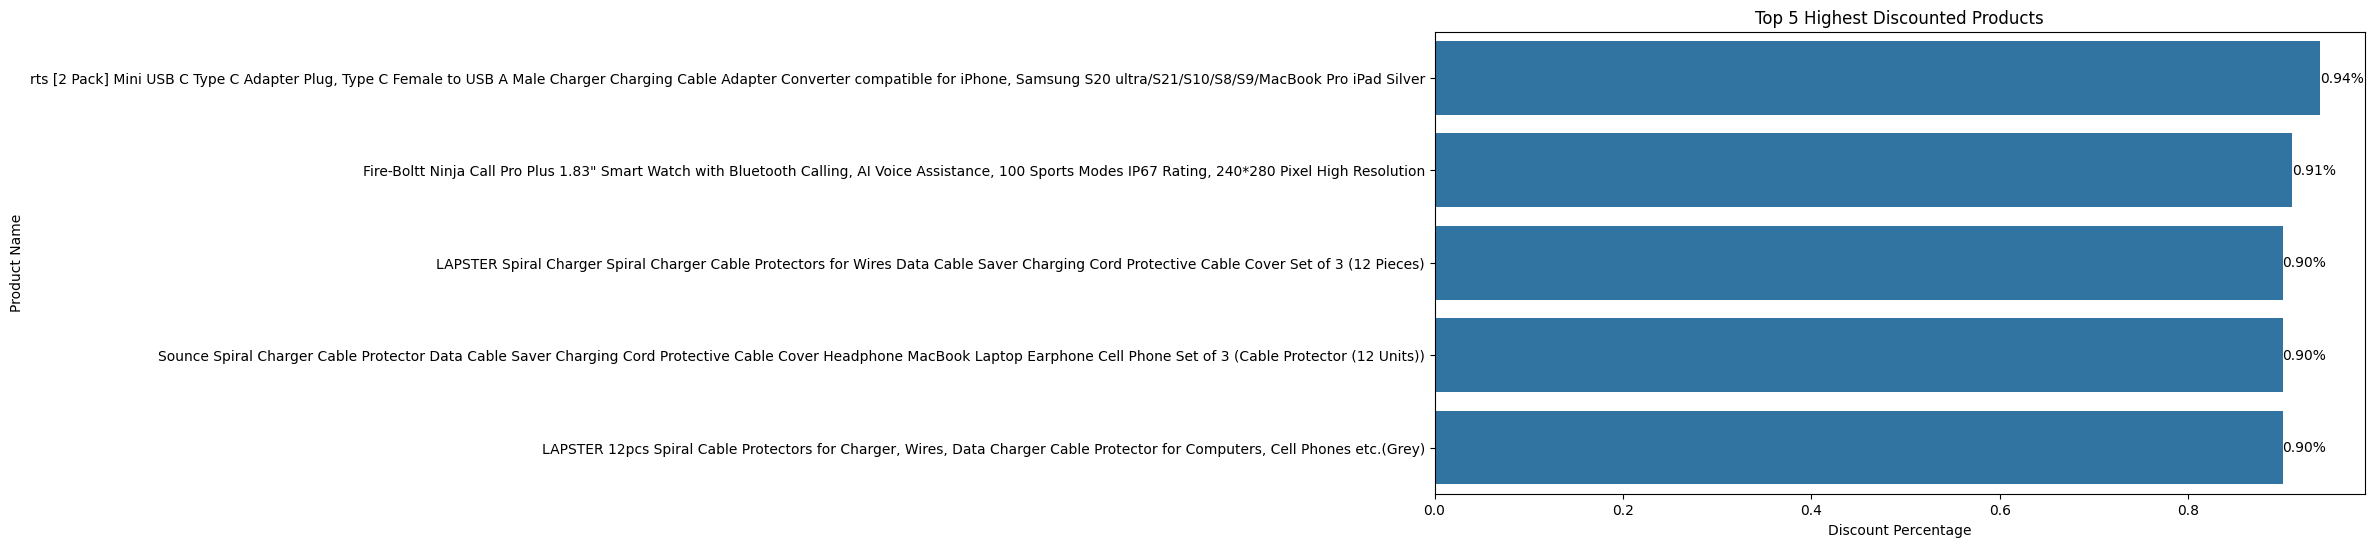

In [ ]:
# Visualizing Top 5 Highest Discounted Products with horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='discount_percentage', y='product_name', data=df.sort_values(by='discount_percentage', ascending=False).drop_duplicates('product_name').head(5), ci=None)
plt.title('Top 5 Highest Discounted Products')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
for index, value in enumerate(df.sort_values(by='discount_percentage', ascending=False).drop_duplicates('product_name').head(5)['discount_percentage']):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.tight_layout()

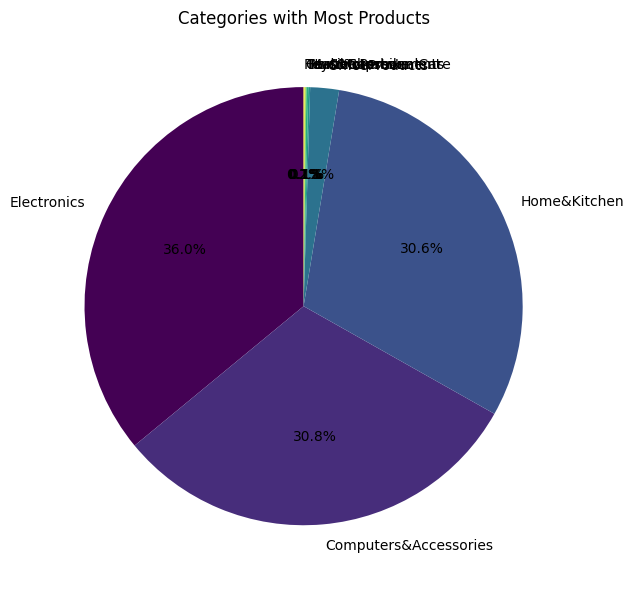

In [ ]:
# Visualizing Categories With Most Products
plt.figure(figsize=(12, 6))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Categories with Most Products')
plt.ylabel('')
plt.tight_layout()

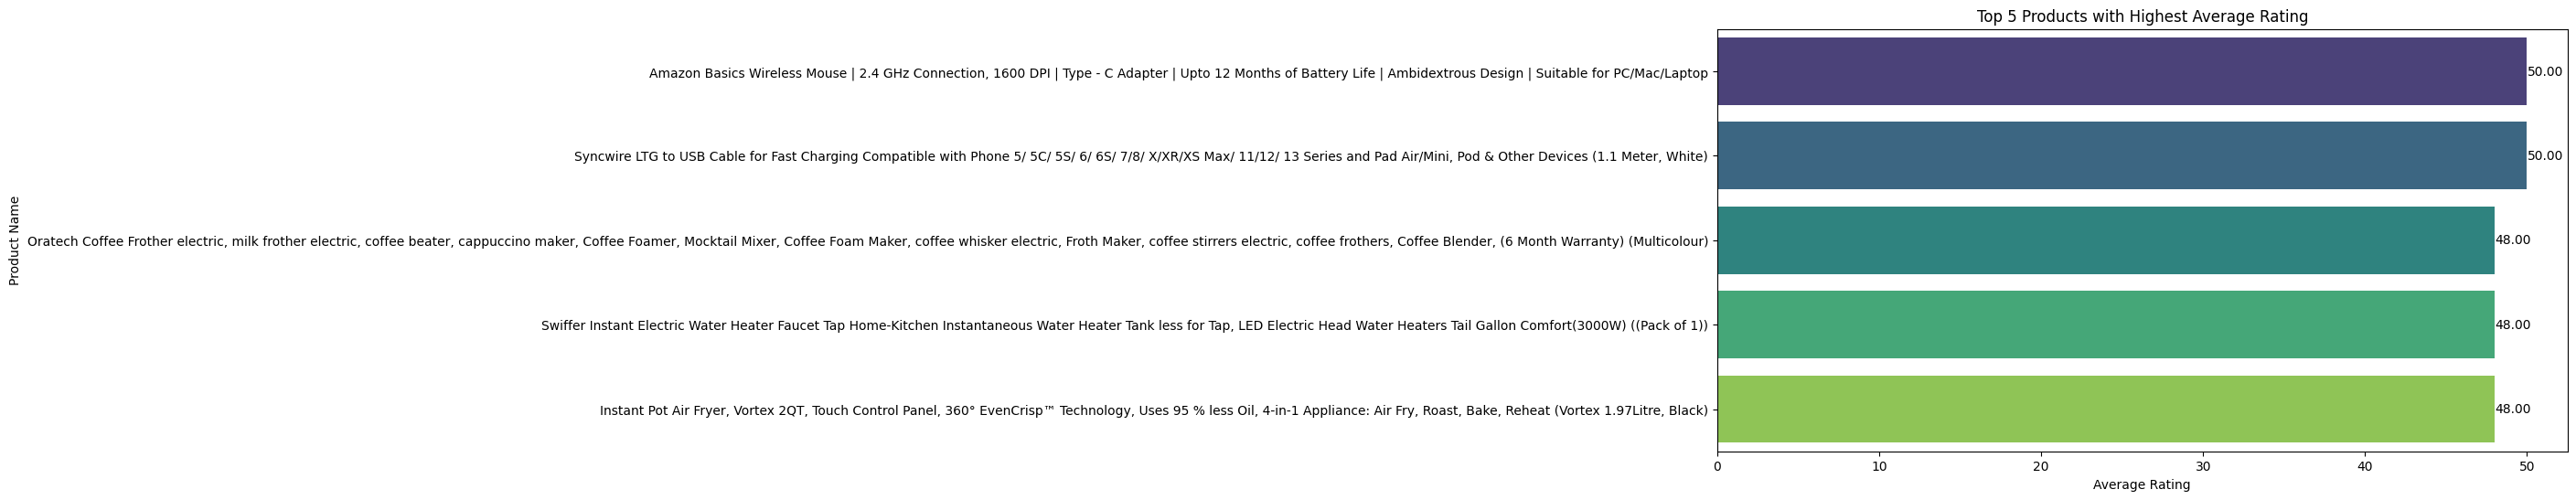

In [ ]:
# Visualizing Top 5 Product With The Highest Average Rating
plt.figure(figsize=(12, 6))
top_5_products = df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(5)
sns.barplot(x=top_5_products.values, y=top_5_products.index, palette='viridis')
plt.title('Top 5 Products with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
for index, value in enumerate(top_5_products):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.tight_layout()